# **Assignment Q4** 

In [4]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def read_edgelist_csv(filename):
    edges = []
    with open(filename, "r", encoding="utf-8") as f:
        reader = csv.reader(f)
        next(reader)  # Skip the header row
        for row in reader:
            if len(row) < 2:
                continue
            u, v = map(int, row[:2])
            edges.append((u, v))
    max_node = max(max(u, v) for u, v in edges)
    N = max_node + 1
    A = np.zeros((N, N), dtype=int)
    for (u, v) in edges:
        A[u, v] = 1
        A[v, u] = 1
    degree = np.sum(A, axis=1)
    return A, degree


def gilbert_random_graph(N, p):
    """Generates an undirected G(n,p) random graph with adjacency matrix."""
    A_rand = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(i + 1, N):
            if random.random() < p:
                A_rand[i, j] = 1
                A_rand[j, i] = 1
    return A_rand

def plot_normalized_degree_distribution(deg_real, deg_random):
    """Plots two scaled/normalized degree distributions for comparison."""
    # real
    unique_deg_real, counts_real = np.unique(deg_real, return_counts=True)
    norm_counts_real = counts_real / np.sum(counts_real)

    # random
    unique_deg_rand, counts_rand = np.unique(deg_random, return_counts=True)
    norm_counts_rand = counts_rand / np.sum(counts_rand)

    plt.figure(figsize=(6,4))
    plt.scatter(unique_deg_real, norm_counts_real, color='b', alpha=0.7, label='Real')
    plt.scatter(unique_deg_rand, norm_counts_rand, color='r', alpha=0.7, label='Random')
    plt.title("Scaled Degree Distribution Comparison")
    plt.xlabel("Degree")
    plt.ylabel("Normalized Frequency")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

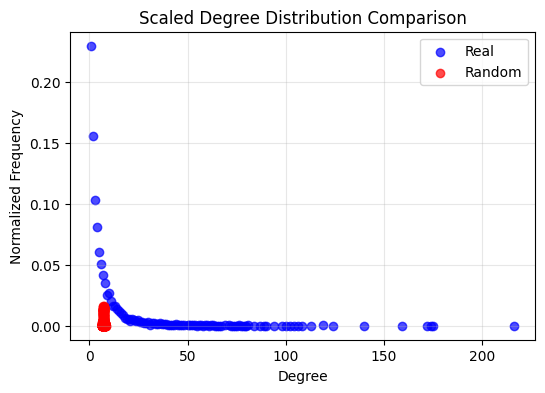

In [6]:
def main():
    # 1. Read real-world network edges from CSV
    A_real, deg_real = read_edgelist_csv("C://Users//dhvan//Downloads//NetworkScience//Assignment1//undirected_graph//lastfm_asia_edges.csv")
    N = A_real.shape[0]
    M = np.sum(A_real) // 2  # number of edges in real graph

    # 2. Probability for Gilbert random graph to have similar edge count
    # expected edges ~ p * (N*(N-1)/2), so p ~ 2M / (N*(N-1))
    p = (2 * M) / (N * (N - 1))

    # 3. Generate 100 random instances and average their degree distributions
    all_degs_random = []
    for _ in range(100):
        A_rand = gilbert_random_graph(N, p)
        deg_rand = np.sum(A_rand, axis=1)
        all_degs_random.append(deg_rand)

    # Combine or average the degrees in any manner as needed.
    # Here we just pick one instance to plot or you can average vector entries.
    deg_random_avg = np.mean(all_degs_random, axis=0)

    # 4. Plot the normalized degree distribution for real vs random
    plot_normalized_degree_distribution(deg_real, deg_random_avg)

if __name__ == "__main__":
    main()